In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import wave
import sys

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


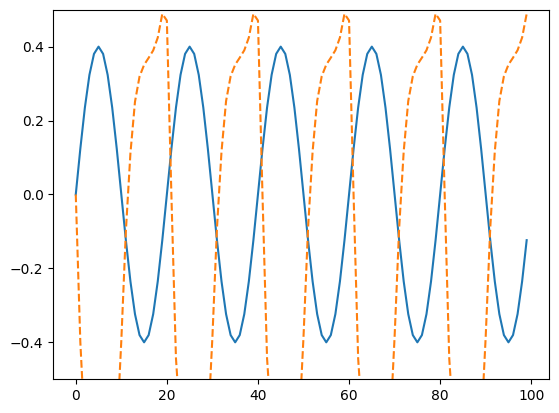

In [48]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(None, 1)),
    keras.layers.TimeDistributed(keras.layers.Dense(8, activation='tanh')),
    keras.layers.LSTM(8, activation="tanh", return_sequences=True, recurrent_activation="sigmoid", use_bias=True),
    keras.layers.Dense(1),
])

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# model.fit(X,y,epochs=2000,batch_size=5,validation_split=0.05,verbose=0);
# scores = model.evaluate(X,y,verbose=1,batch_size=5)
# print('Accuracy: {}'.format(scores[1])) 

# construct signals
N = 100
x = 10 * np.sin(np.arange(N) * np.pi * 0.1)
y = model.predict(x.reshape((1, -1, 1)))
y = y.flatten()

# plot signals
plt.figure()
plt.plot(x / 25)
plt.plot(y, '--')
plt.ylim(-0.5, 0.5)
plt.show()

24343200


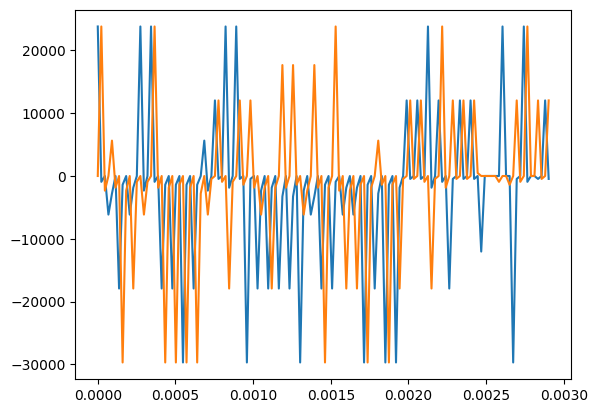

In [87]:
with wave.open("res/muff-input-guitar.wav", "r") as wav:
    # TODO(toms): assert wav.getsampwidth() == 2
    sig = np.frombuffer(wav.readframes(-1), dtype=np.int16)
    print(len(sig)) 

    sig = sig[1000:][:256] # sub-clip

    deinterleaved = [sig[idx::wav.getnchannels()] for idx in range(wav.getnchannels())]

    for track in deinterleaved:
        time = np.linspace(0, len(track) / wav.getframerate(), num=len(track))
        plt.plot(time, track)
        
    plt.show()